# (3주차 ML) 3월 17일
> training set / test set (생선분류문제)
- toc: true
- branch: master
- badges: false
- comments: true
- author: dinonene
- categories: [python]

### training set / test set

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [21]:
len(fish_length), len(fish_weight)

(49, 49)

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [23]:
fish_data[0]

[25.4, 242.0]

In [4]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [5]:
print(fish_data[4])

[29.0, 430.0]


In [6]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [7]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
train_input = fish_data[:35]   ## index 0~34
train_target = fish_target[:35] 

test_input = fish_data[35:]  ## index 35~48
test_target = fish_target[35:]

In [15]:
len(train_input), len(train_target)

(35, 35)

In [16]:
len(test_input), len(test_target)

(14, 14)

In [10]:
## test set에서 평가하기
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

- 정확도가 0% 이다?
- test input에 있는 샘플 14개를 모두 못 맞췄다는 것이다.
- WHY ? $\Rightarrow$ **<font color="red">샘플링 편향</font>**

### 샘플링 편향

 - 왜그런가 봤더니 처음에 fish_length와 fish_weight를 도미 35개, 빙어 14개를 쭉 늘어놓고 두 리스트를 합쳤다.
 - 두 리스트를 합친 fish_data에서 앞에 35개를 훈련 뒤에 14개를 test set으로 잘랐다.
 - 즉, 훈련세트에는 빙어가 하나도 없고, 테스트셋에는 도미가 하나도 없게 된다.
    - $\Rightarrow$ 미적분 공부하고 확통시험 본 격..
 - train set과 test set을 나눌 때에는 빙어와 도미 두 class가 잘 섞여있도록 만들어야 한다.

### Numpy

- 이제 Numpy를 이용해서 잘 섞어서 train set과 test set으로 나눠보자.
- Numpy는 파이썬의 대표적인 배열  library
- scikit-learn이나 matplotlib librayr도 넘파이에 크게 의존하고 있고, 입력 데이터가 Numpy로 전달될 거라고 가정하고 있다.
    - predict method 결과값이 array([1])이런 형태로 출력되는 것도 이러한 이유.(사이킷런의 predict 메서드의 반환값을 넘파이 배열로 리턴)
- 딥러닝 TensorFlow도 Numpy와도 타이트한 관계가 있다.

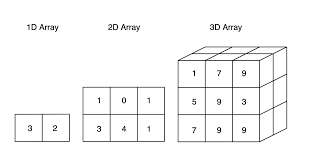

- 1차원 배열(벡터), 2차원 배열(행렬), 3차원 배열

#### `-` training set / test set (using Numpy)

- input과 target이 함께 섞여서 이동을 해야한다. (섞여야 한다)
- 지도학습에서 입력과 타겟이 쌍을 이루고 있게 되는데 따로따로 섞여버리면 정답을 제대로 못주게 되서 엉터리 훈련이 되버린다.
- 입력데이터 특성값과 타깂값이 쌍으로 잘 따라서 섞이도록 만들어야 하는것이 중요!!!
    - index를 섞어 분리하는 방법

In [25]:
import numpy as np

In [26]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [27]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [28]:
print(input_arr.shape)

(49, 2)


`-` 0~48까지 정수로된 index 만들기

In [29]:
index = np.arange(49)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

`-` index를 섞어준다.

In [30]:
np.random.seed(42)
np.random.shuffle(index)

In [31]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


- 잘 섞였다...

In [34]:
input_arr[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [18]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


`-` 랜덤하게 섞인 인덱스 배열에서 앞부분 35개를 훈련셋으로 두고, 뒷부분 14개를 테스트 셋으로 둔다

In [35]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [34]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [35]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [36]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

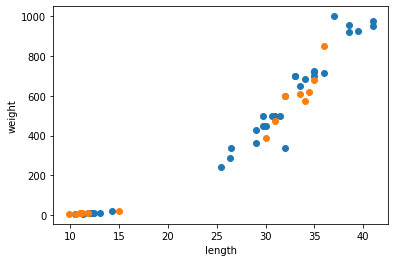

In [37]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### KNN (두번째 머신러닝 프로그램)

In [38]:
kn = kn.fit(train_input, train_target)

In [39]:
kn.score(test_input, test_target)

1.0

In [40]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [41]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])